In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Import and Filter Data

In [34]:
# Import raw data
raw_data = pd.read_csv('city_day.csv')

# Creating dataset from raw data, dropping AQI Bucket
data = raw_data.drop(['AQI_Bucket'], axis=1)

# Dropping rows with missing AQI values
data = data.dropna(subset=['AQI'])

# Convert the date to correct format
data['Date'] = pd.to_datetime(data['Date'])

In [35]:
# Reduce number of locations
regions = ['Amritsar', 'Amaravati', 'Jaipur']
data = data[data['City'].isin(regions)]

# Reset Index
data = data.reset_index(drop=True)

# Missing Values

In [36]:
# Missing Values
data.isnull().sum()

City          0
Date          0
PM2.5        90
PM10         30
NO           55
NO2          12
NOx         334
NH3          16
CO           82
SO2         140
O3           85
Benzene     189
Toluene     206
Xylene     1444
AQI           0
dtype: int64

# EDA on Benzene, Toluene & Xylene

- Large numbers of data missing for Benzene, Toluene & Xylene
- Normalise and check for correlation with AQI

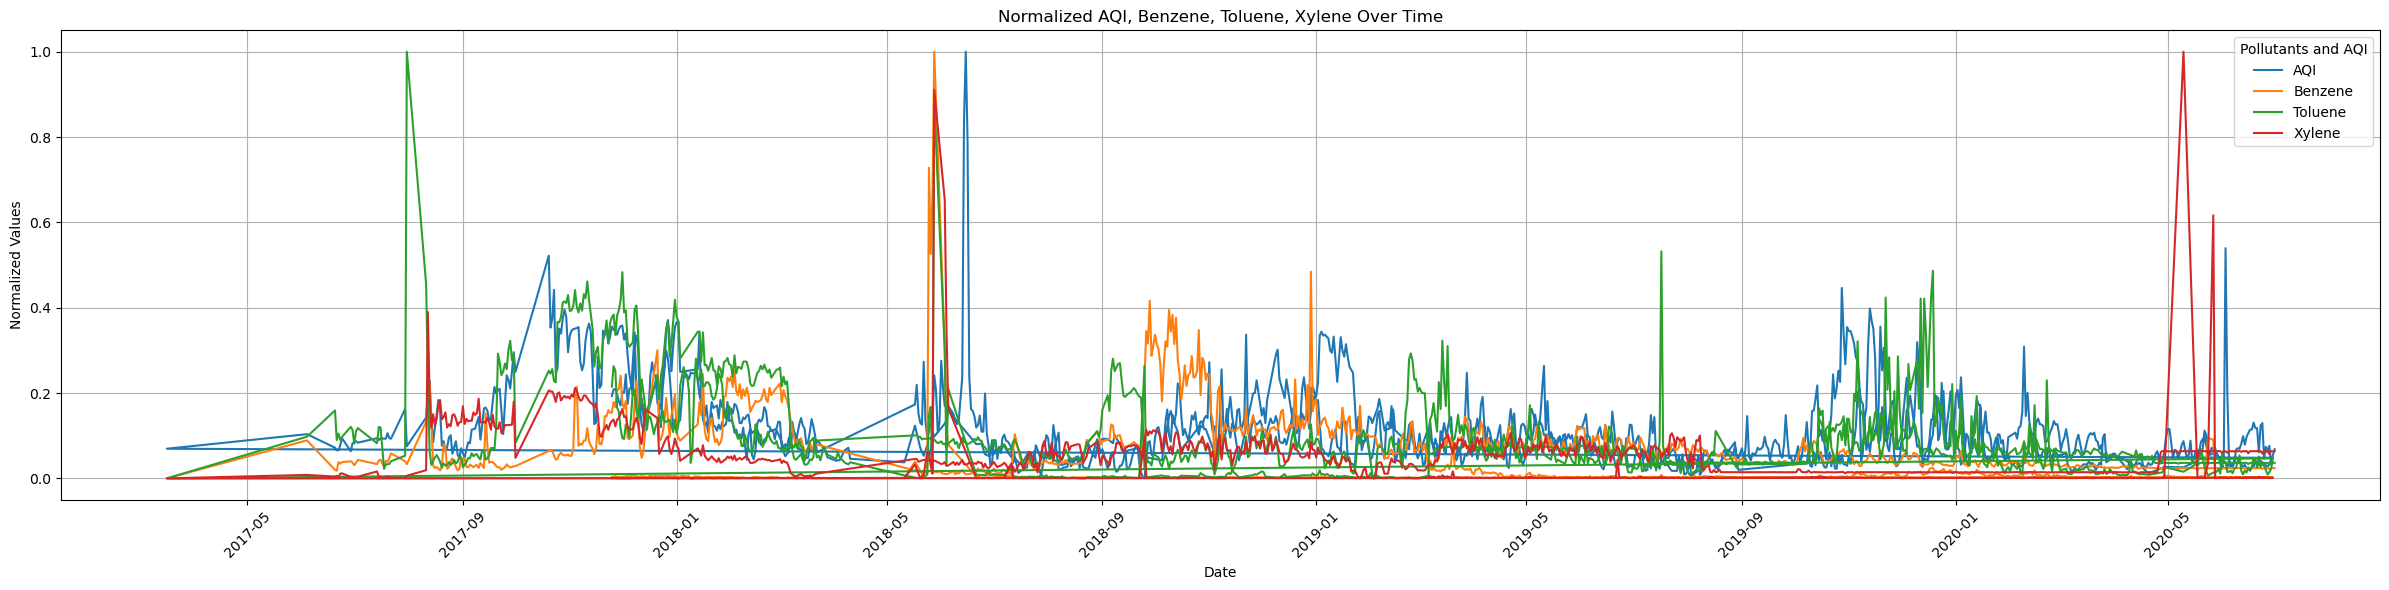

In [37]:
# Select relevant columns (AQI, Benzene, Toluene, Xylene, and Date)
columns_to_normalize = ['AQI', 'Benzene', 'Toluene', 'Xylene']

# Drop rows with missing values in these columns to avoid issues during normalization
df_filtered = data[['Date'] + columns_to_normalize].dropna()

# Normalize the selected columns using Min-Max scaling (0 to 1)
scaler = MinMaxScaler()
df_filtered[columns_to_normalize] = scaler.fit_transform(df_filtered[columns_to_normalize])

# Plot the normalized data
plt.figure(figsize=(24, 6))  # Adjust figure size as needed

# Plot each pollutant and AQI over time
for col in columns_to_normalize:
    plt.plot(df_filtered['Date'], df_filtered[col], label=col)

# Customize the plot
plt.title('Normalized AQI, Benzene, Toluene, Xylene Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend(title='Pollutants and AQI')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()
plt.show()

- Correlation Matrix for a Benzene, Toluene & Xylene with AQI\ 

In [38]:
df_filtered.drop(['Date'], axis=1).corr()

,AQI,Benzene,Toluene,Xylene
AQI,1.000000,0.161793,0.430127,0.220132
Benzene,0.161793,1.000000,0.332796,0.487772
Toluene,0.430127,0.332796,1.000000,0.350304
Xylene,0.220132,0.487772,0.350304,1.000000


In [39]:
# Drop Benzene, Toluene, Xylene from data
data.drop(['Benzene', 'Toluene', 'Xylene'], axis=1, inplace=True)

# Visualise Missing Data

<Figure size 1500x1000 with 0 Axes>

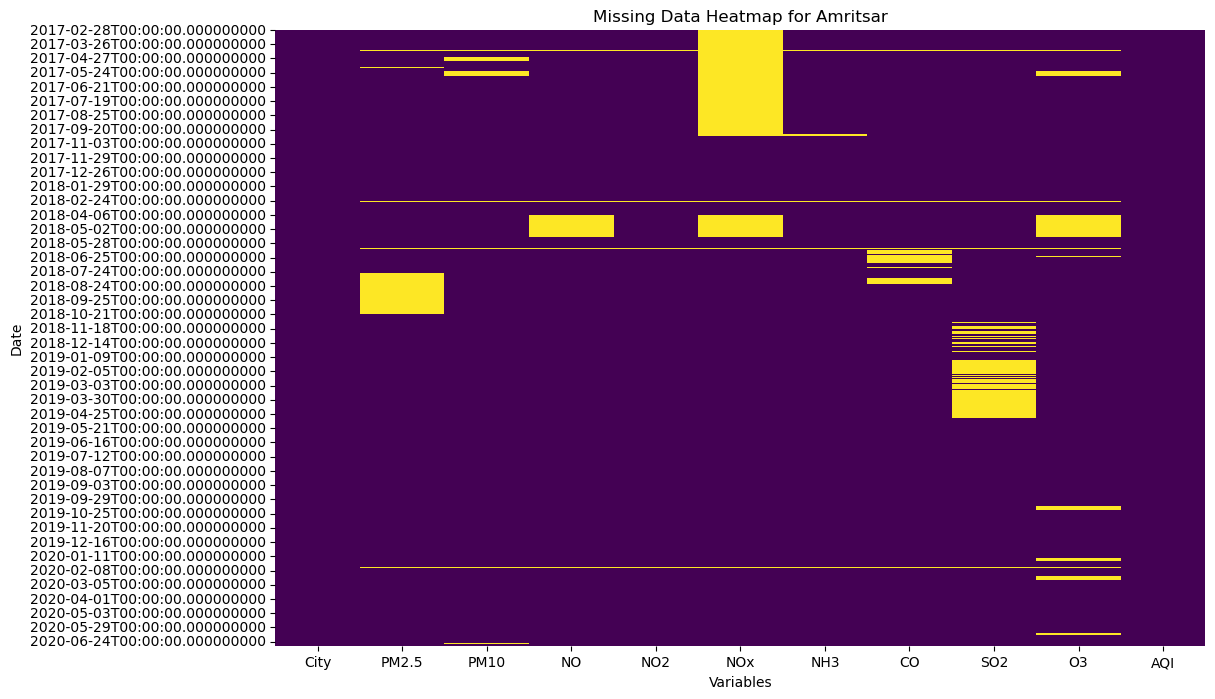

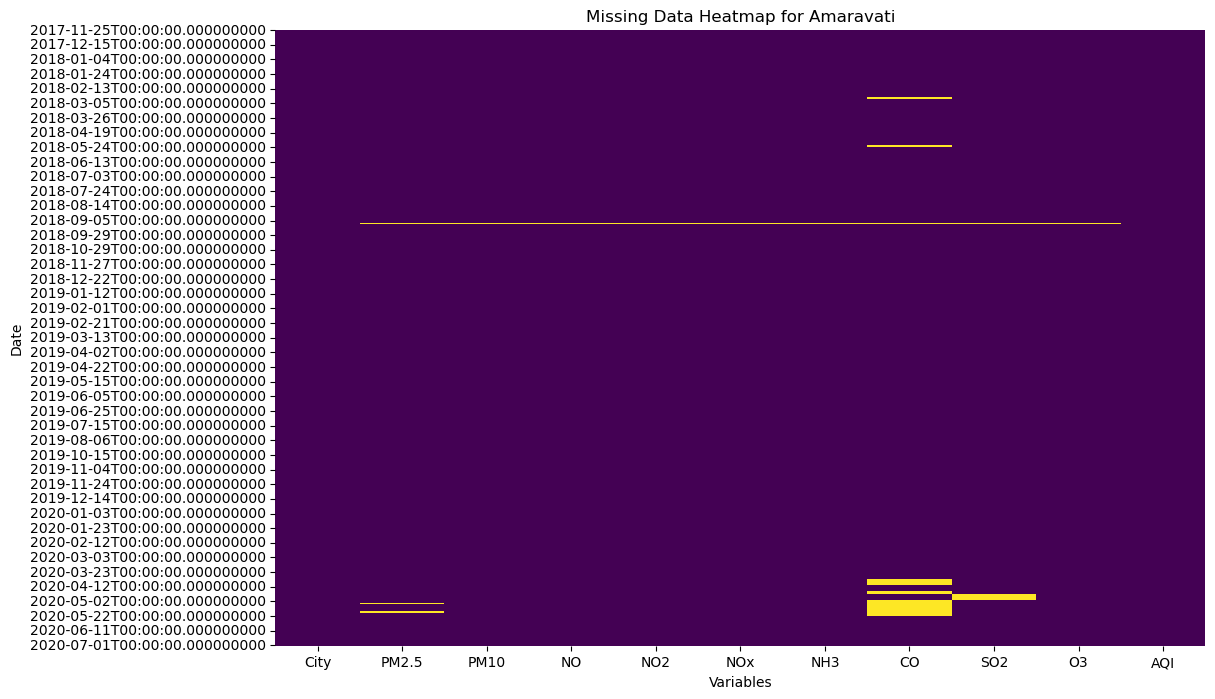

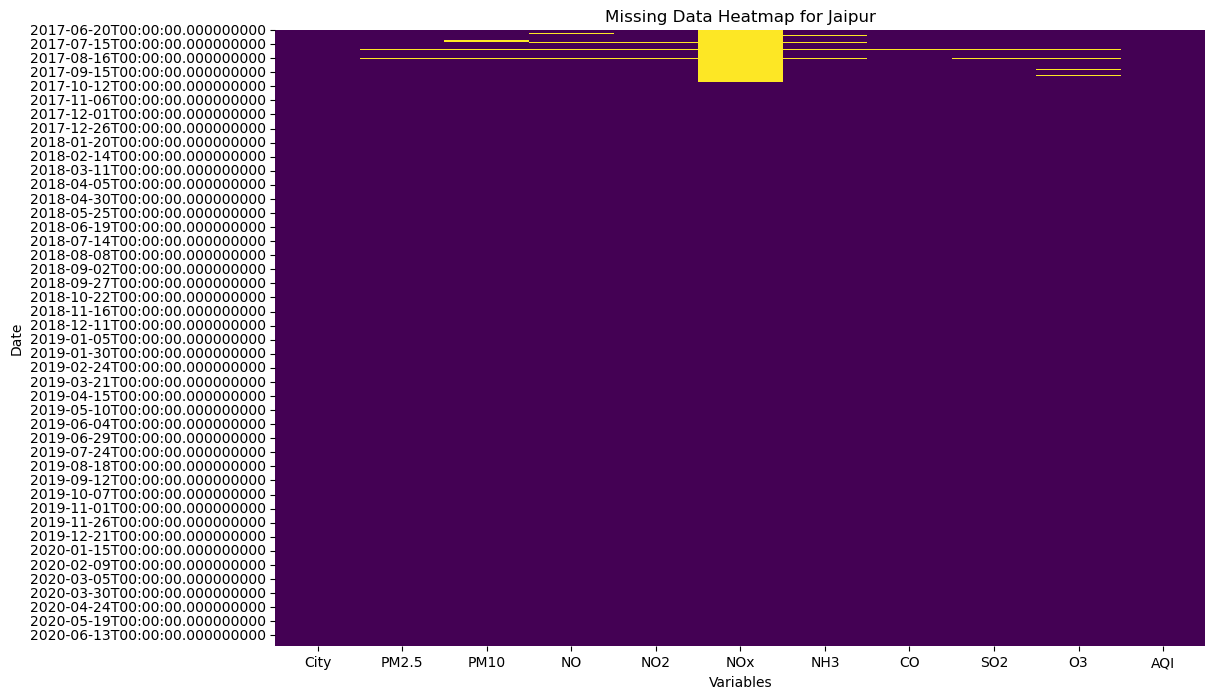

In [40]:
plt.figure(figsize=(15, 10))  # Set the overall figure size

for city in regions:
    # Filter data for the city
    city_data = data[data['City'] == city]
    
    # Set 'Date' as index for better time-based heatmap
    city_data.set_index('Date', inplace=True)
    
    # Create a heatmap of missing values (True = missing, False = present)
    plt.figure(figsize=(12, 8))
    sns.heatmap(city_data.isnull(), cbar=False, cmap='viridis')
    
    # Customize plot
    plt.title(f"Missing Data Heatmap for {city}")
    plt.xlabel("Variables")
    plt.ylabel("Date")
    
    # Show the plot
    plt.show()

- Data is missing in random intervals
- Apply Iterative Imputer to predict missing values. Done by iteratively calculating entries using other data.

# Outliers

- Produce box plots for each feature to establish distribution & outliers

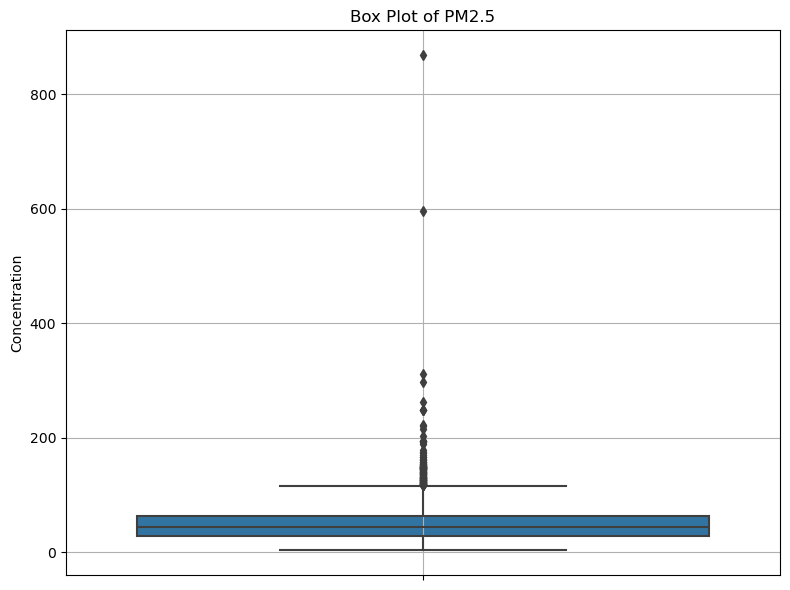

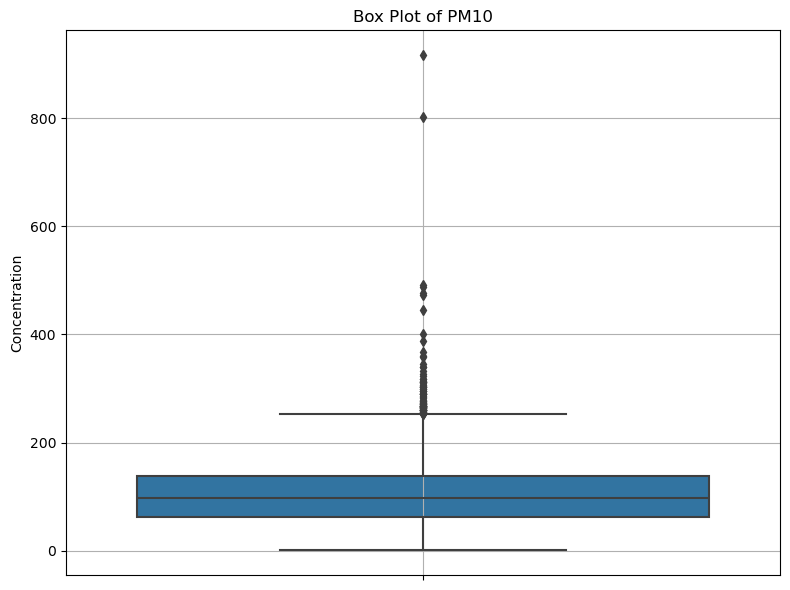

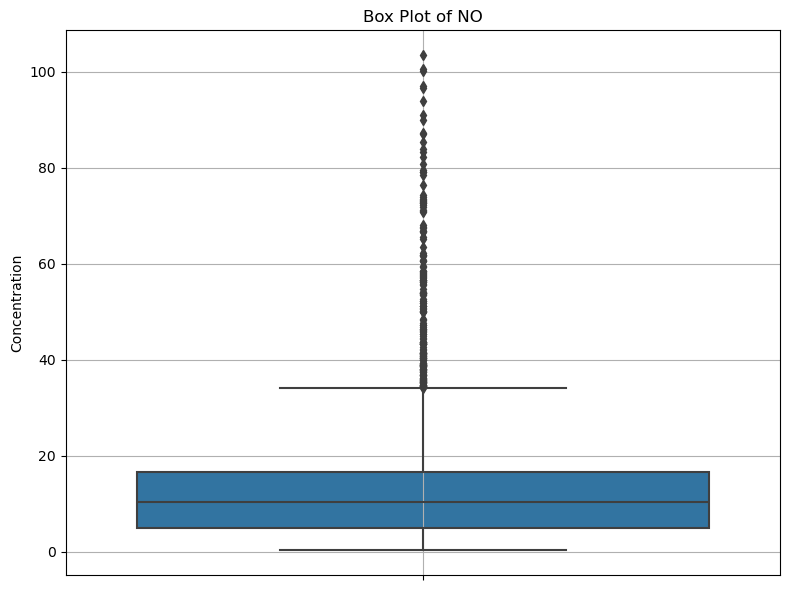

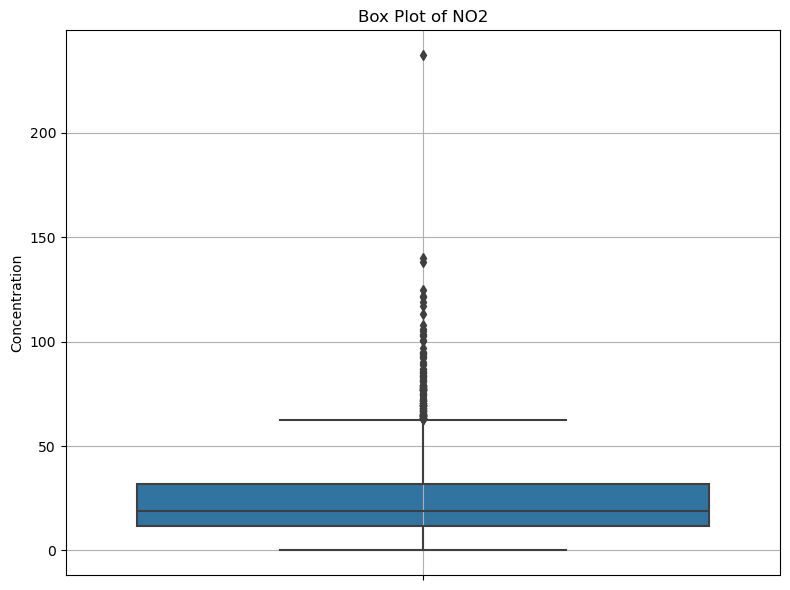

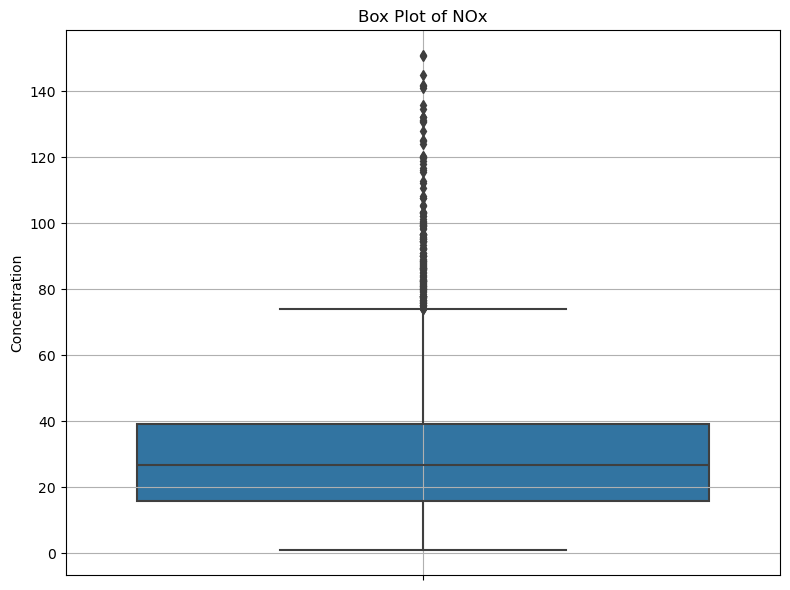

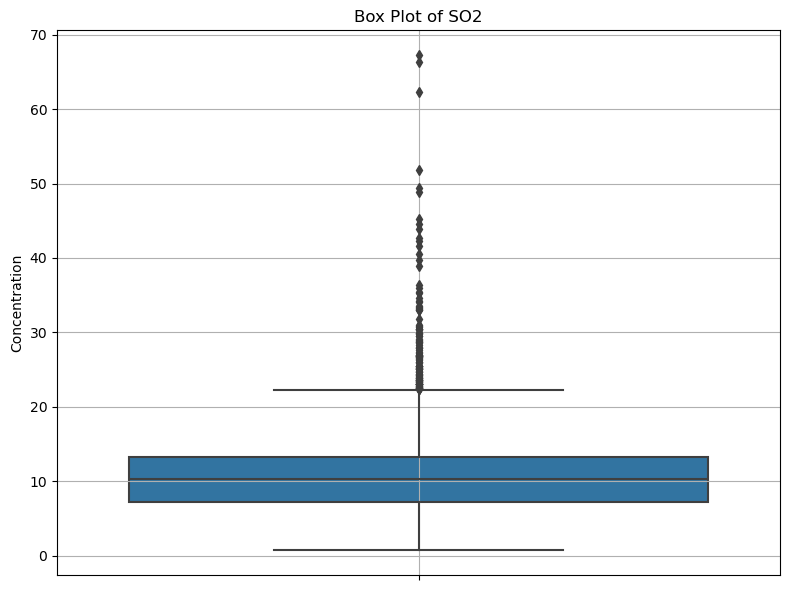

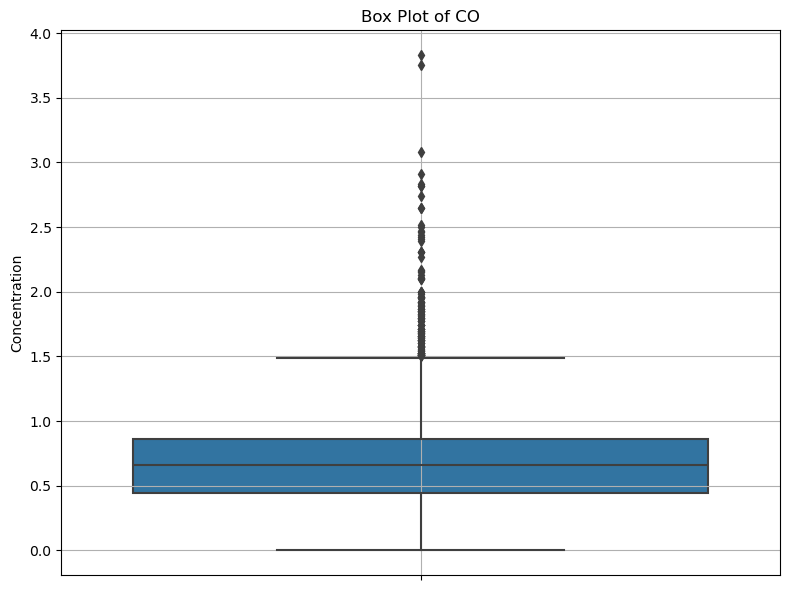

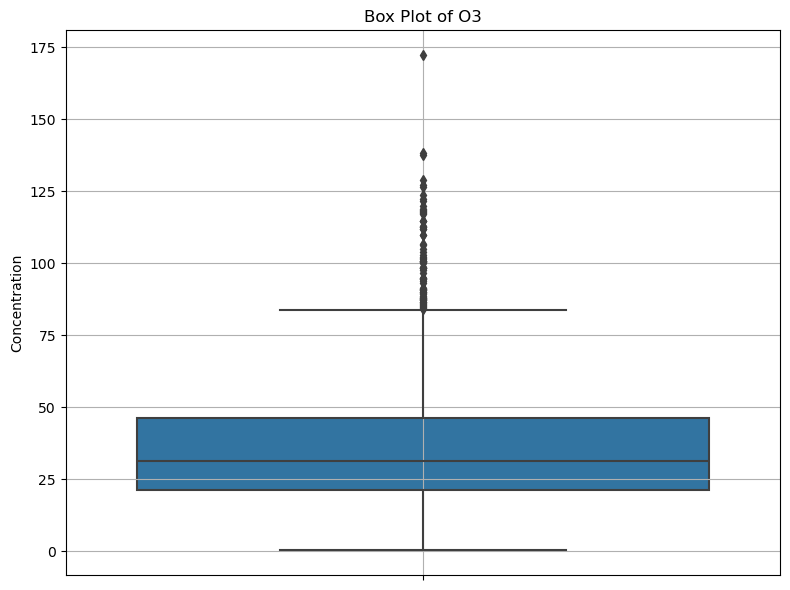

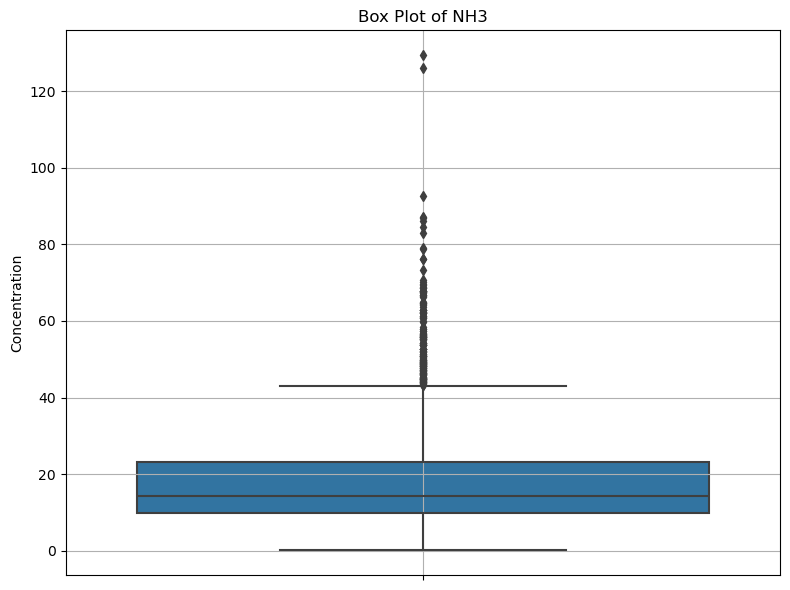

In [41]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'O3', 'NH3']

for pollutant in pollutants:
    plt.figure(figsize=(8, 6))  # Set the figure size for each plot
    
    # Create a boxplot for the current pollutant
    sns.boxplot(y=data[pollutant])
    
    # Customize the plot
    plt.title(f"Box Plot of {pollutant}")
    plt.ylabel("Concentration")
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

Number of outliers?

In [42]:
# Function to count outliers in a given series (column)
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers.count()


# Create a dictionary to store the outlier counts for each pollutant
outlier_counts = {pollutant: count_outliers(data[pollutant]) for pollutant in pollutants}

# Display the outlier counts
for pollutant, count in outlier_counts.items():
    print(f"Number of outliers in {pollutant}: {count}")


Number of outliers in PM2.5: 107
Number of outliers in PM10: 84
Number of outliers in NO: 181
Number of outliers in NO2: 124
Number of outliers in NOx: 136
Number of outliers in SO2: 120
Number of outliers in CO: 120
Number of outliers in O3: 78
Number of outliers in NH3: 161


# Missing Weather Data

In [2]:
import pandas as pd

amarvati = pd.read_csv('amarvati.csv')
print(amarvati.isna().sum())

date                    0
temperature_mean        0
temperature_max         0
humidity_mean           0
humidity_max            0
dew_point_mean          0
dew_point_max           0
precipitation_sum       0
rain_sum                0
cloud_cover_sum         0
wind_speed_10m_mean     0
wind_speed_10m_max      0
wind_speed_100m_mean    0
wind_speed_100m_max     0
dtype: int64


In [4]:
amritsar = pd.read_csv('amritsar.csv')
print(amritsar.isna().sum())

date                    0
temperature_mean        0
temperature_max         0
humidity_mean           0
humidity_max            0
dew_point_mean          0
dew_point_max           0
precipitation_sum       0
rain_sum                0
cloud_cover_sum         0
wind_speed_10m_mean     0
wind_speed_10m_max      0
wind_speed_100m_mean    0
wind_speed_100m_max     0
dtype: int64


In [5]:
jaipur = pd.read_csv('jaipur.csv')
print(jaipur.isna().sum())

date                    0
temperature_mean        0
temperature_max         0
humidity_mean           0
humidity_max            0
dew_point_mean          0
dew_point_max           0
precipitation_sum       0
rain_sum                0
cloud_cover_sum         0
wind_speed_10m_mean     0
wind_speed_10m_max      0
wind_speed_100m_mean    0
wind_speed_100m_max     0
dtype: int64


# Skew of Data

In [2]:
import pandas as pd

data = pd.read_csv('model_data.csv')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


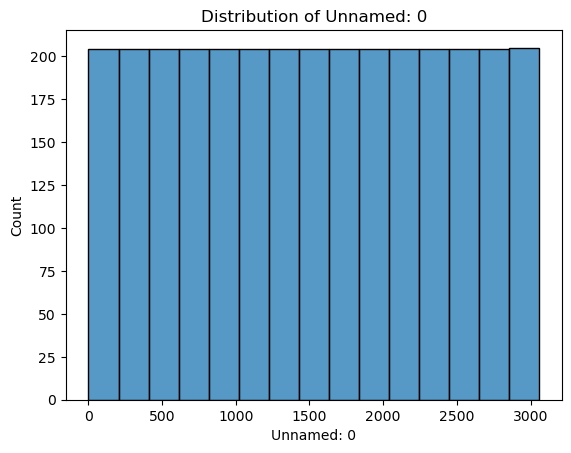

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


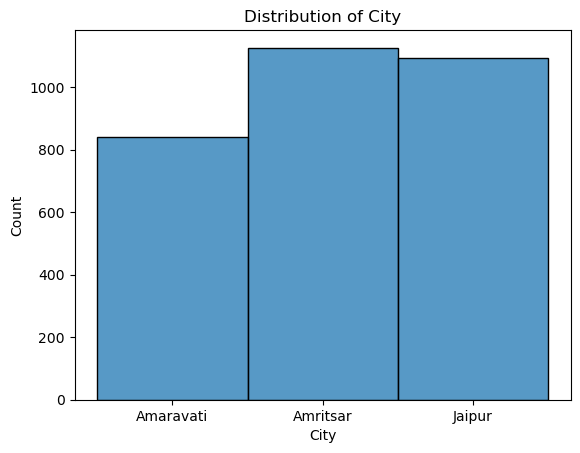

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


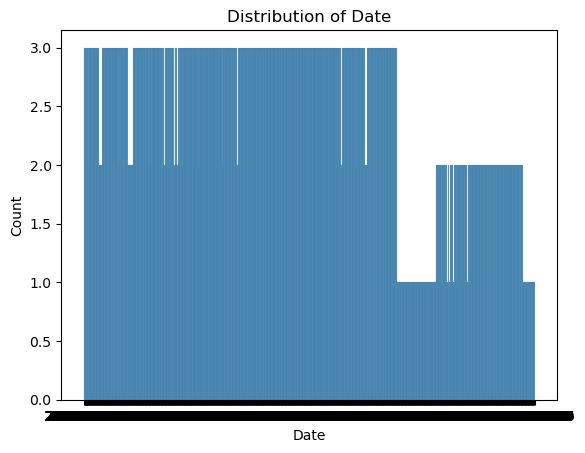

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


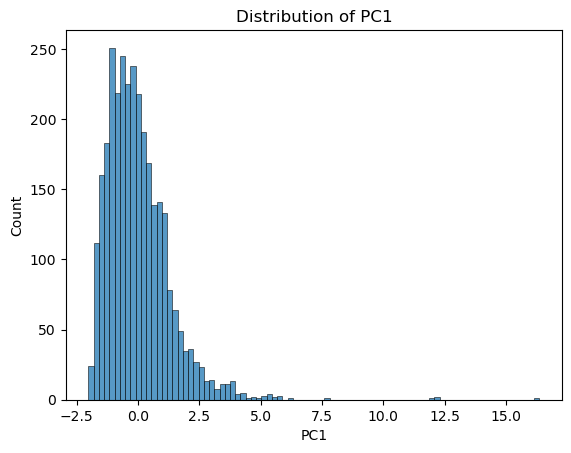

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


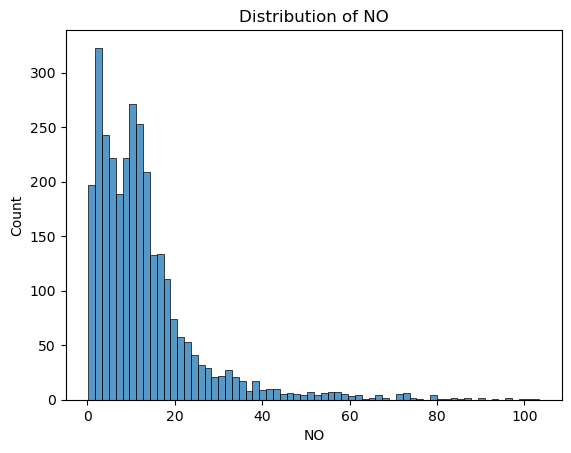

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


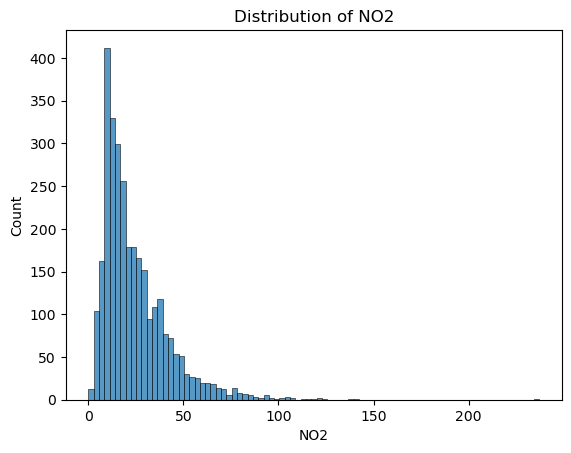

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


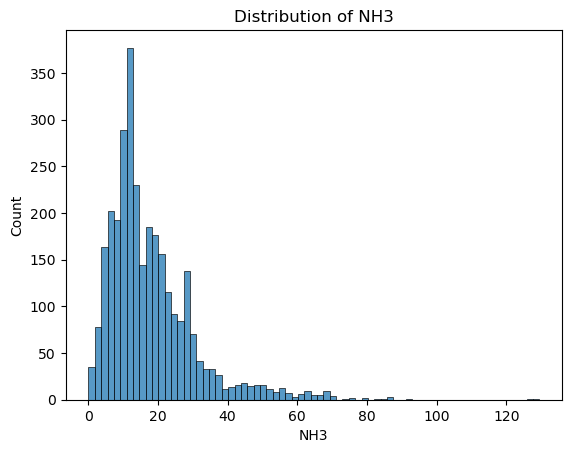

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


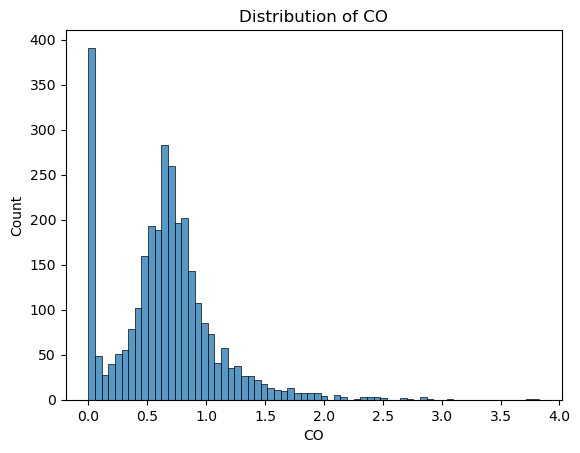

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


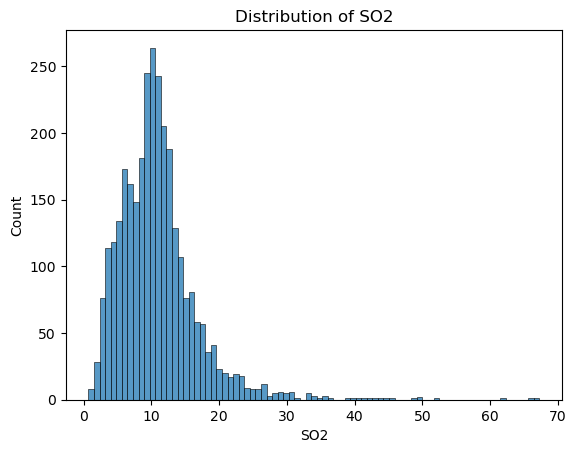

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


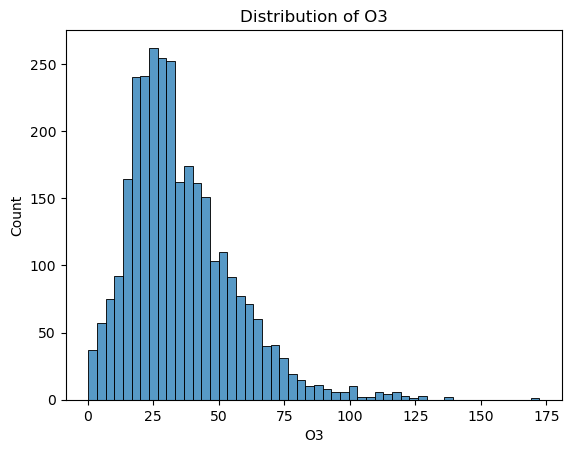

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


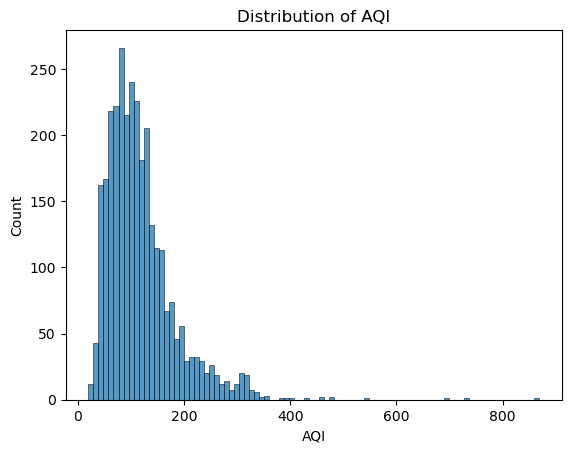

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


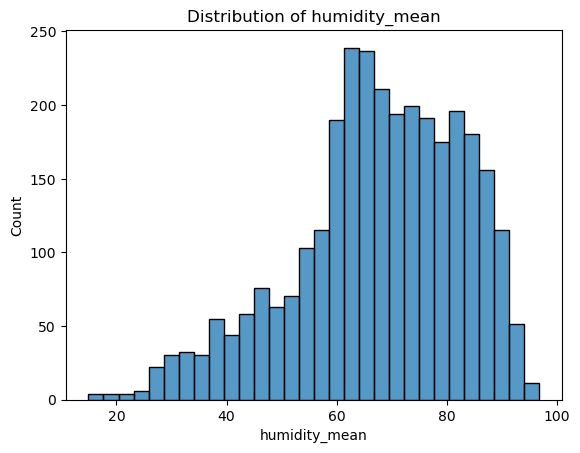

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


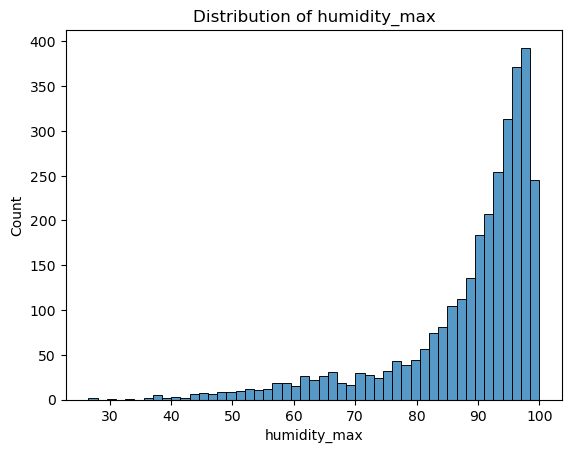

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


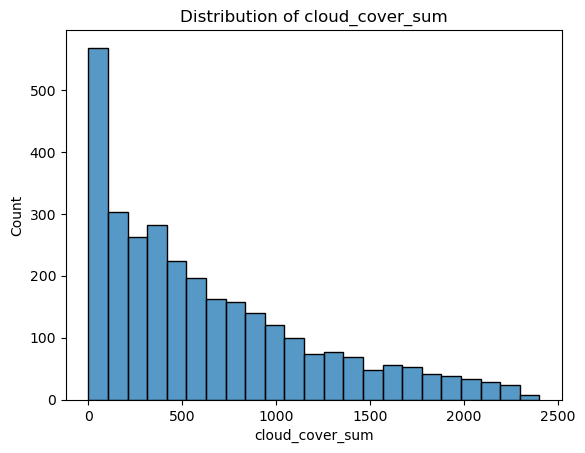

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


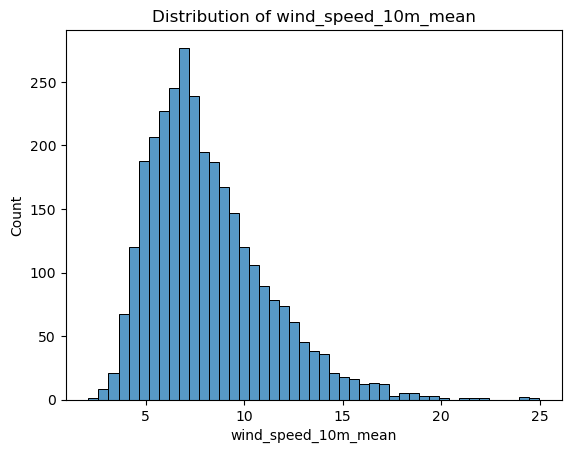

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


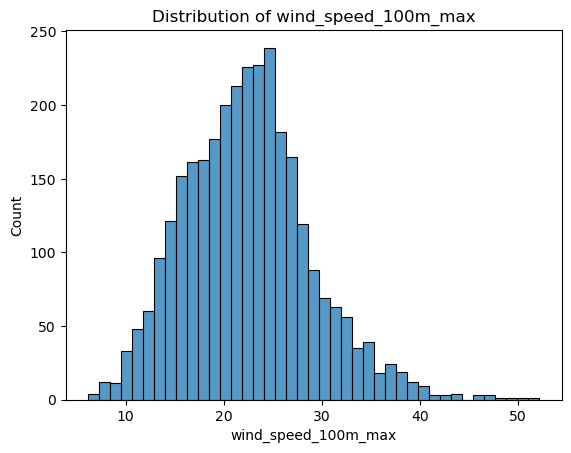

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data.columns:
    plt.figure()
    sns.histplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.show()